## Sandbox 3
Sandbox for the dataset from https://open.canada.ca/data/en/dataset/ec3282b6-013f-41b1-aa63-24ad8bda79ee

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
data = pd.read_csv("../Data/38100286.csv")
years = data["REF_DATE"].unique()
IndPrim = data["VECTOR"].map(len) == 10

In [3]:
types = data["Primary heating system and type of energy"]
types = types[IndPrim].unique()
types = types[1:-1]

In [4]:
colors = ['b', 'y', 'k', 'tab:brown', 'g', 'goldenrod', 'r', 'm']
lines = [Line2D([0], [0], color=colors[j], linewidth=3) for j in range(len(colors))]

In [5]:
geoU = data["GEO"].unique();
ProvList = geoU[1:11]
nProv = 10; 

In [6]:
def PlotProvince(PROV):
    dataTemp = data[ IndPrim & (data["GEO"] == PROV) ]
    dataTempVal = dataTemp["VALUE"]
    
    dataTempValyears = pd.concat([ dataTempVal[ data["REF_DATE"] == years[0] ].reset_index(drop=True),
                                   dataTempVal[ data["REF_DATE"] == years[1] ].reset_index(drop=True),
                                   dataTempVal[ data["REF_DATE"] == years[2] ].reset_index(drop=True) ], axis = 1)
    dataTempValyears.columns = years
    dataTempValyears = dataTempValyears[1:].reset_index(drop=True)
    
    nanInd = np.isnan(dataTempValyears)
    dataTempValyears[ nanInd ] = 0
    nanIndr = ~np.any(nanInd, axis=1)
    
    ss = dataTempValyears.sum()
    dataTempValyears = 100*dataTempValyears/ss
    
    bt = dataTempValyears.cumsum()
    bt.iloc[-1] = 0
    
    ax = fig.add_subplot(4, 3, j+1)
    n_rows = len(dataTempValyears)
    for row in range(n_rows):
        if j==0: 
            plt.legend(lines, types, ncol=1, fontsize=16, loc=10);
            ax.axis('off')
        else:
            if nanIndr[row]:
                plt.bar(years, dataTempValyears.iloc[row], 1, bottom=bt.iloc[row-1], color=colors[row])
            plt.title(PROV, fontsize=18);
            plt.xticks(years);
    #plt.legend(types[nanIndr], ncol=2, loc=6, bbox_to_anchor=(0.5, -0.1));

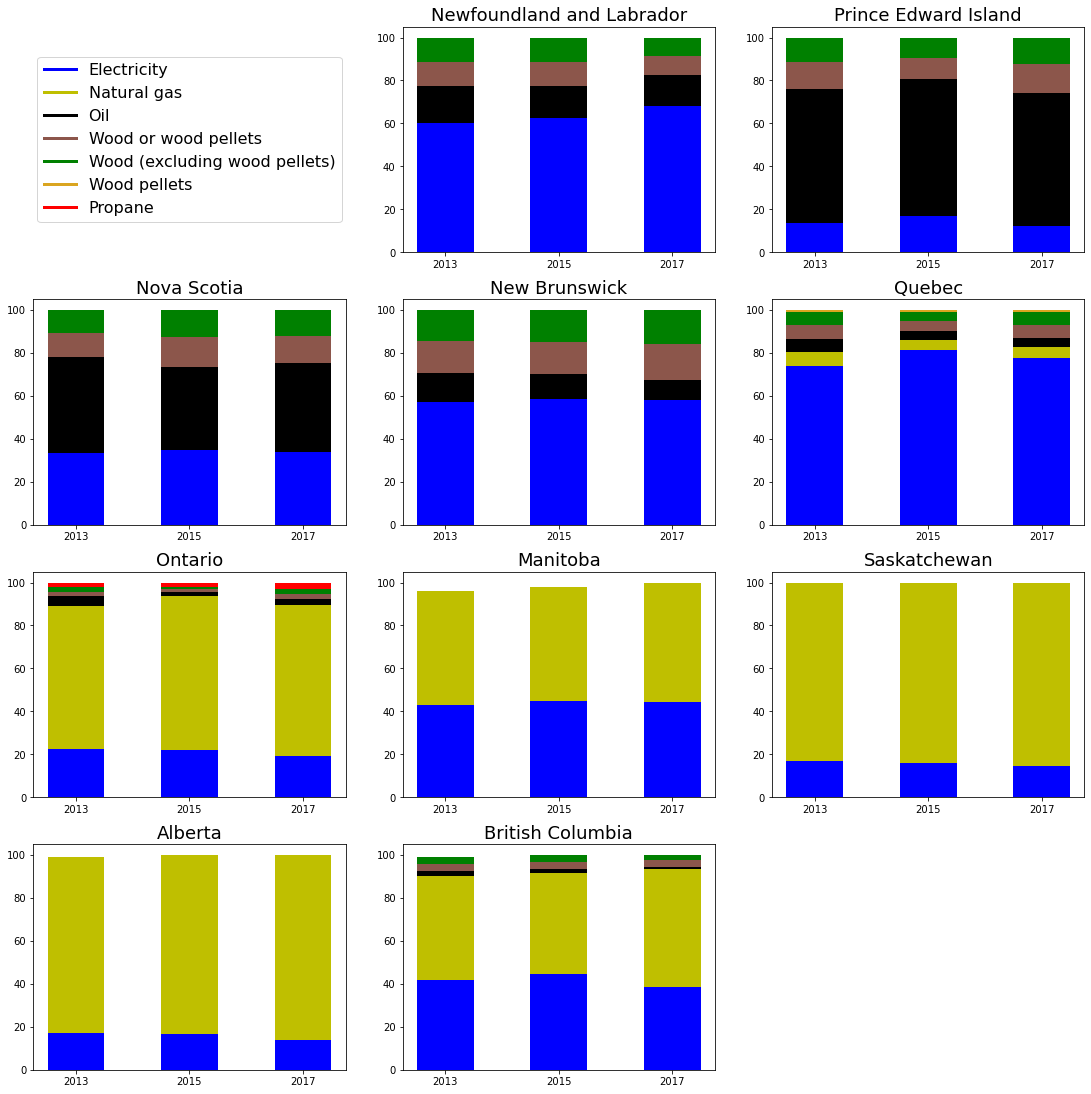

In [7]:
fig = plt.figure(figsize=(15, 15))
for j in range(nProv+1):
    PlotProvince(ProvList[j-1])
plt.tight_layout(pad=0.0, w_pad=0.2, h_pad=1.0)

